In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
## Reading the house price file ##

In [3]:
df1 = pd.read_excel("house_price_data.xlsx")
df1.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df1.shape

(414, 9)

In [5]:
## Processing the data ##

In [6]:
df1.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [7]:
df1.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
# Checking the data for normalization #

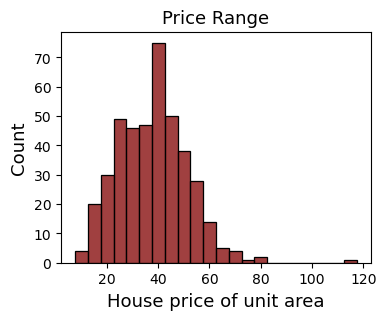

In [9]:
import seaborn as sns
plt.figure(figsize=(4,3))
sns.histplot(df1["House price of unit area"],color="Maroon")
plt.title("Price Range",size=13)
plt.xlabel("House price of unit area",size=13)
plt.ylabel("Count",size=13)
plt.show()

In [10]:
# Removing the outliers from the data #

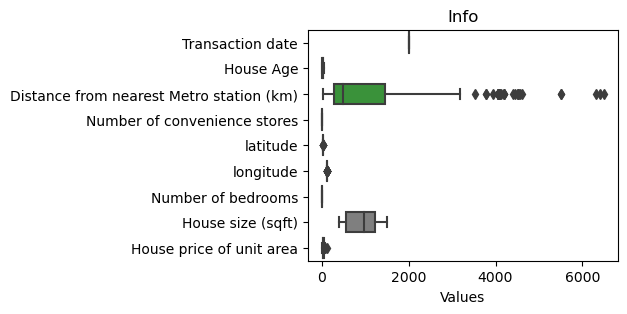

In [11]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df1, orient = 'h');
plt.title("Info")
# plt.ylabel("Outlier Values",size=13)
plt.xlabel("Values",size=10)
plt.show()

In [12]:
Q1, Q3 = df1['Distance from nearest Metro station (km)'].quantile([0.25, 0.75])
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Q1=", Q1,"Q3=", Q3,"IQR=", IQR,"lower_limit=",lower_limit,"upper_limit=",upper_limit )

Q1= 289.3248 Q3= 1454.279 IQR= 1164.9542000000001 lower_limit= -1458.1065000000003 upper_limit= 3201.7103


In [13]:
df2 = df1[(df1['Distance from nearest Metro station (km)']>lower_limit) & (df1['Distance from nearest Metro station (km)']<upper_limit)]

In [14]:
df2.shape

(377, 9)

In [15]:
# Filtering important features of house price only

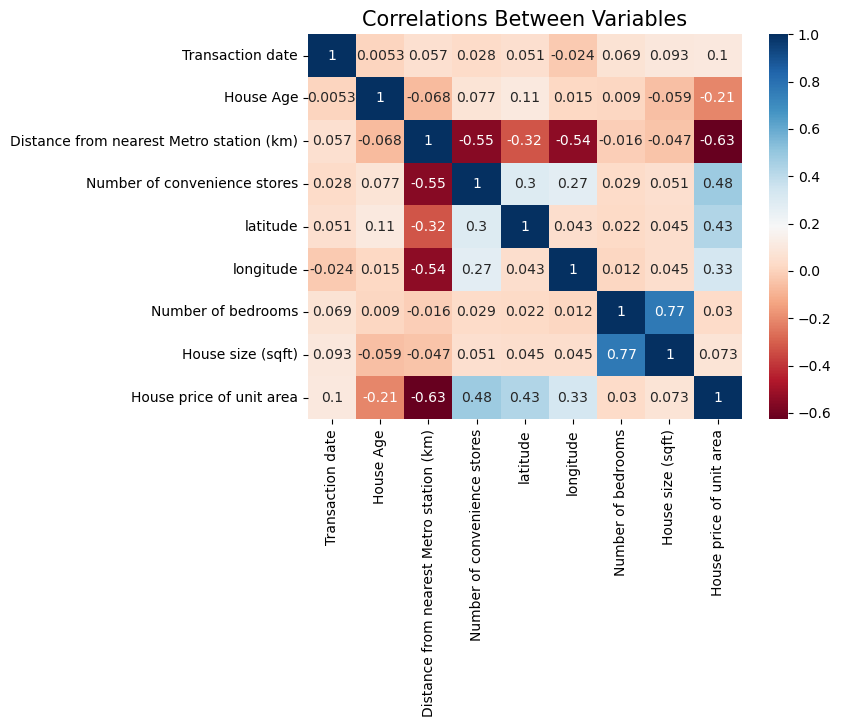

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(), annot = True, cmap= "RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [17]:
imp_cols = list(df2.corr()['House price of unit area'][(df2.corr()['House price of unit area']>0.30) | (df2.corr()['House price of unit area']<-0.30)].index)
imp_cols

['Distance from nearest Metro station (km)',
 'Number of convenience stores',
 'latitude',
 'longitude',
 'House price of unit area']

In [18]:
df3 = df2[imp_cols]
df3.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1


In [19]:
## Defining Training and Test Set ##

In [20]:
X = df3.drop(['House price of unit area'], axis=1)
y = df3['House price of unit area']

In [21]:
X.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
0,84.87882,10,24.98298,121.54024
1,306.59470,9,24.98034,121.53951
2,561.98450,5,24.98746,121.54391
3,561.98450,5,24.98746,121.54391
4,390.56840,5,24.97937,121.54245


In [22]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=10)

In [25]:
## Model Training ##

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_error(y_test,y_predictions):
    rmse=np.sqrt(mean_squared_error(y_test, y_predictions))
    r2=r2_score(y_test,y_predictions)
    return rmse,r2
def model_error_cv(model):
    rmse_cv=np.sqrt(-1*cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")).mean()
    return rmse_cv

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [28]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), BaggingRegressor(), 
          GradientBoostingRegressor(), DecisionTreeRegressor(),  SVR(), KNeighborsRegressor(), XGBRegressor(),  MLPRegressor()]
model_compare = pd.DataFrame(columns=["Model","RMSE","R2","RMSE_CV"])
for model in models:
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_test)
    rmse, r2 = model_error(y_test, y_predictions)
    rmse_cv = model_error_cv(model)
    new_compare_row = pd.DataFrame({'Model': [type(model).__name__] ,'RMSE': [rmse],'R2': [r2], 'RMSE_CV': [rmse_cv]})
    model_compare = pd.concat([model_compare, new_compare_row], ignore_index=True)

In [29]:
from sklearn.preprocessing import PolynomialFeatures      # This code is different
model = PolynomialFeatures()
X_train_2d = model.fit_transform(X_train)
X_test_2d = model.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_2d, y_train)
y_predictions = model2.predict(X_test_2d)
rmse, r2 = model_error(y_test, y_predictions)
rmse_cv = model_error_cv(model2)
new_compare_row = pd.DataFrame({'Model': [type(model).__name__] ,'RMSE': [rmse],'R2': [r2], 'RMSE_CV': [rmse_cv]})
model_compare = pd.concat([model_compare, new_compare_row], ignore_index=True)

In [30]:
## Model Comparison ##

In [31]:
# Cross Validation Error tells about the expected error in a new test data. So it should be used for comparing models.

In [32]:
model_compare

,Model,RMSE,R2,RMSE_CV
0,LinearRegression,12.246994,0.290574,8.187217
1,Ridge,12.559655,0.253889,8.650061
2,Lasso,12.474904,0.263924,8.691026
3,ElasticNet,12.476648,0.263718,8.687836
4,RandomForestRegressor,11.226116,0.403916,6.814089
5,BaggingRegressor,11.044258,0.423072,7.052945
6,GradientBoostingRegressor,11.409610,0.384271,6.892010
7,DecisionTreeRegressor,11.559481,0.367989,8.290922
8,SVR,12.345905,0.279068,8.391299
9,KNeighborsRegressor,11.990237,0.320008,7.867395


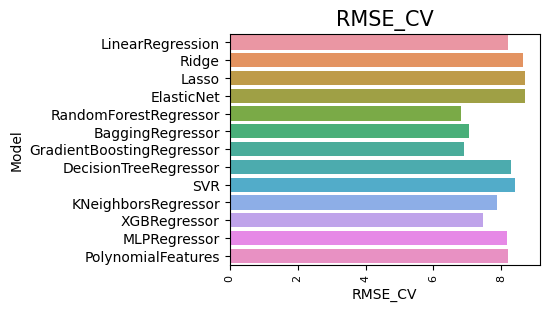

In [33]:
plt.figure(figsize=(4,3))
sns.barplot(model_compare["RMSE_CV"], model_compare["Model"], orient ='h')
plt.title("RMSE_CV", size=15)
plt.xticks(rotation=90, size=8)
plt.show()

In [34]:
model = model_compare[model_compare.RMSE_CV == model_compare.RMSE_CV.min()]
model

,Model,RMSE,R2,RMSE_CV
4,RandomForestRegressor,11.226116,0.403916,6.814089


In [35]:
X_test.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
413,90.45606,9,24.97433,121.54310
357,338.96790,9,24.96853,121.54413
245,639.61980,5,24.97258,121.54814
172,90.45606,9,24.97433,121.54310
399,170.12890,1,24.97371,121.52984


In [36]:
np.array(y_test)

array([ 63.9,  44.9,  40.8,  58.1,  37.3,  54.4,  45.5,  27. ,  48.5,
        55. ,  53. ,  29.5,  40.3,  28.9,  41.2,  55.2,  25.3,  21.8,
        46.1,  30. ,  42.2,  48.2,  28.5,  36.6,  44.3,  47.1,  44.2,
        51.7,  56.3,  48. ,  42.2,  28.1,  39.6,  40.9,  23.6,  45.1,
        39.4,  28.4,  40. ,  40.1,  29.3,  34.1,  28.5,  42.5,  52.5,
        23.8,  35.3,  27.7,  23. ,  44. ,  52.2, 117.5,  62.2,  36.3,
        50.8,  21.3,  62.9,  21.5,  33.6,  51. ,  42.5,  48.1,  47. ,
        37.4,  55.3,  34.2,  36.5,  39.4,   7.6,  43.2,  30.8,  20.9,
        35.5,  29.8,  28.8,  23.5])

In [37]:
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X_train, y_train)
y_predictions = RandomForestRegressor.predict(X_test)
y_predictions

array([55.9296101 , 40.33012857, 40.85093333, 55.9296101 , 35.779     ,
       51.99291667, 47.96201905, 27.4565    , 46.5064    , 49.62776674,
       49.62776674, 26.93854444, 38.19577381, 26.93854444, 49.62776674,
       47.96201905, 24.79347619, 23.2346    , 50.1402381 , 39.83325   ,
       39.36551461, 55.16985119, 39.68362381, 45.3972881 , 49.94910671,
       41.75280952, 39.3010289 , 49.62776674, 55.9296101 , 39.45035238,
       52.93877489, 27.7490381 , 39.84768333, 47.53840595, 29.92275   ,
       50.5028254 , 47.77773135, 30.10760101, 38.69566667, 47.77773135,
       35.779     , 37.85933333, 36.31450238, 40.58057611, 48.63273143,
       23.625     , 40.16310714, 24.92832381, 30.0205    , 51.99291667,
       44.08663333, 43.87688333, 55.9296101 , 42.87363333, 40.33012857,
       24.50586667, 36.92017024, 24.266     , 44.91235952, 49.62776674,
       39.3010289 , 43.81453333, 39.65469318, 34.94237143, 36.93986667,
       37.5948    , 39.23720043, 47.81206667, 34.6914119 , 39.45